In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('engineered_data.csv')

In [4]:
years = df['dateYear'].unique()

In [5]:
categories = df['indicatorName'].unique()
categories.sort()

In [6]:
years

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2030],
      dtype=int64)

In [7]:
categories

array(['Adjusted net savings (% of GNI)',
       'Adolescent birth rate (births per 1,000 women ages 15-19)',
       'Age-standardized mortality rate attributed to noncommunicable diseases, female',
       'Age-standardized mortality rate attributed to noncommunicable diseases, male',
       'Average annual change in the share of bottom 40 percent (%)',
       'Birth registration (% under age 5)',
       'Carbon dioxide emissions, per unit of GDP (kg per 2010 US$ of GDP)',
       'Carbon dioxide emissions, production emissions per capita (tonnes)',
       'Child malnutrition, stunting (moderate or severe) (% under age 5)',
       'Coefficient of human inequality',
       'Concentration index (exports) (value)',
       'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)',
       'Current health expenditure (% of GDP)',
       'Domestic material consumption per capita, (tonnes)',
       'Education index',
       'Employment in agricultu

# Why HDI?

The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.
The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone.

## Corelation Matrix

In [8]:
def df_restructure(col,row):
    data = pd.DataFrame(index = row,  columns = col) 
    for (columnName, columnData) in data.iteritems():
            for ind in data.index:
                value = df['indicatorValueNum'].loc[(df['dateYear'] == ind) & (df['indicatorName'] == columnName)].values
                if value.size == 0:
                    value = 0.0
                else:
                    value = value[0]
                data[columnName][ind] = value  
    data = data.astype(float)
    return data

In [9]:
fields = ['Education index','Gender Development Index (GDI)','Life expectancy index','Income index',
          'Gross domestic product (GDP), total (2017 PPP $ billions)','Human Development Index (HDI)']
df1 = df_restructure(fields,years)

In [10]:
df1

,Education index,Gender Development Index (GDI),Life expectancy index,Income index,"Gross domestic product (GDP), total (2017 PPP $ billions)",Human Development Index (HDI)
1990,0.691810,0.000000,0.853662,0.894214,2910.426440,0.808
1991,0.705422,0.000000,0.856800,0.899836,0.000000,0.816
1992,0.714792,0.000000,0.860062,0.901345,0.000000,0.821
1993,0.739874,0.000000,0.863508,0.898608,0.000000,0.831
1994,0.749785,0.000000,0.867200,0.900658,0.000000,0.837
1995,0.758784,0.943752,0.871123,0.902169,3210.108430,0.842
1996,0.766853,0.000000,0.875246,0.903197,0.000000,0.846
1997,0.774854,0.000000,0.879477,0.905335,0.000000,0.851
1998,0.794163,0.000000,0.883708,0.907749,0.000000,0.860
1999,0.809546,0.000000,0.887908,0.910298,0.000000,0.868


In [11]:
# scaler = StandardScaler() 

In [12]:
# df1 = scaler.fit_transform(df1) 

In [13]:
# df1

### Pearson

to measure the degree of the relationship between linearly related variables

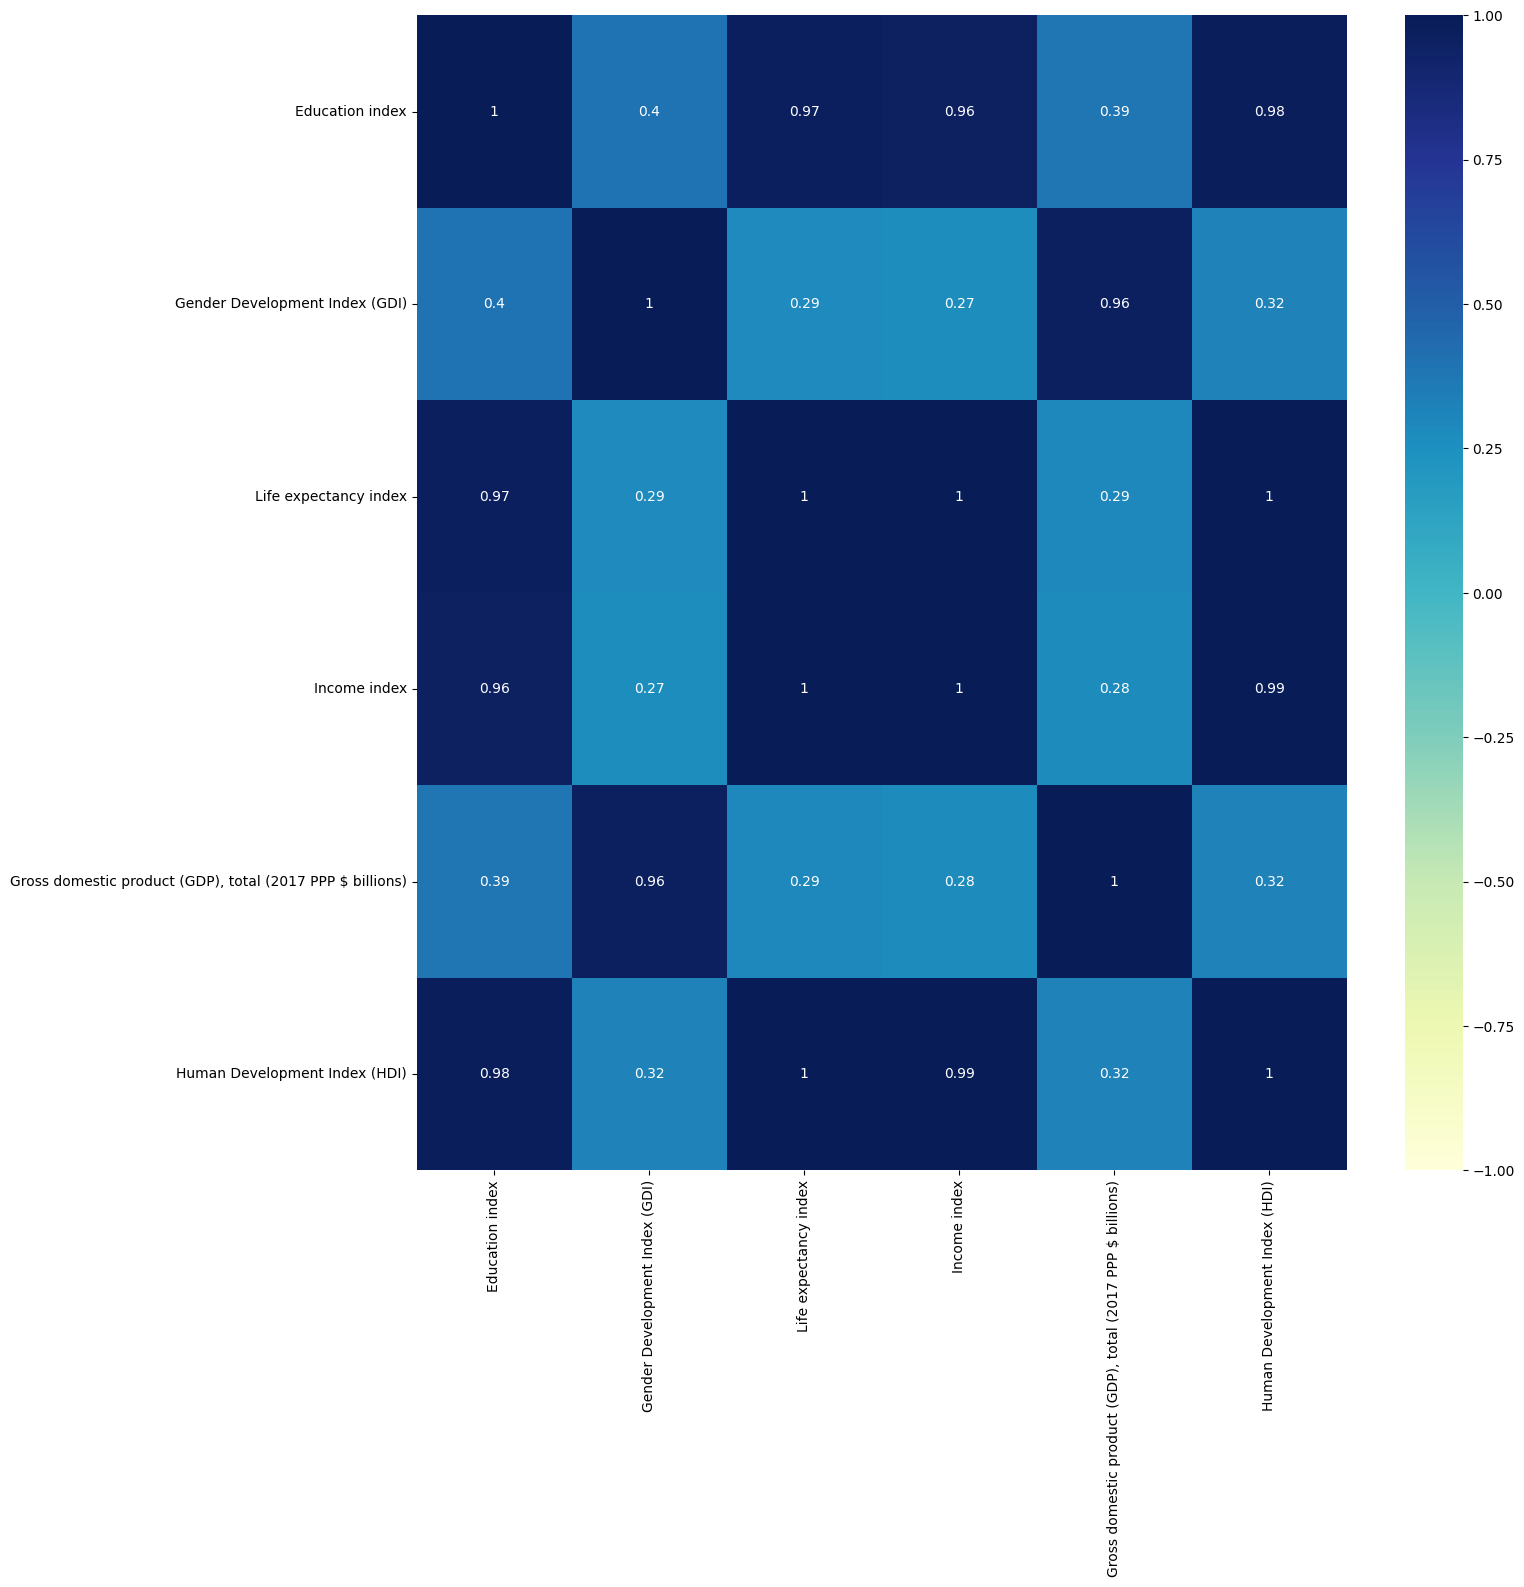

In [14]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df1.corr(method='pearson'), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")

In [15]:
df1.corr(method='pearson')

,Education index,Gender Development Index (GDI),Life expectancy index,Income index,"Gross domestic product (GDP), total (2017 PPP $ billions)",Human Development Index (HDI)
Education index,1.000000,0.397692,0.969252,0.956465,0.387957,0.984667
Gender Development Index (GDI),0.397692,1.000000,0.287922,0.267192,0.961267,0.322960
Life expectancy index,0.969252,0.287922,1.000000,0.998803,0.294562,0.997305
Income index,0.956465,0.267192,0.998803,1.000000,0.277220,0.992693
"Gross domestic product (GDP), total (2017 PPP $ billions)",0.387957,0.961267,0.294562,0.277220,1.000000,0.324550
Human Development Index (HDI),0.984667,0.322960,0.997305,0.992693,0.324550,1.000000


### Spearman

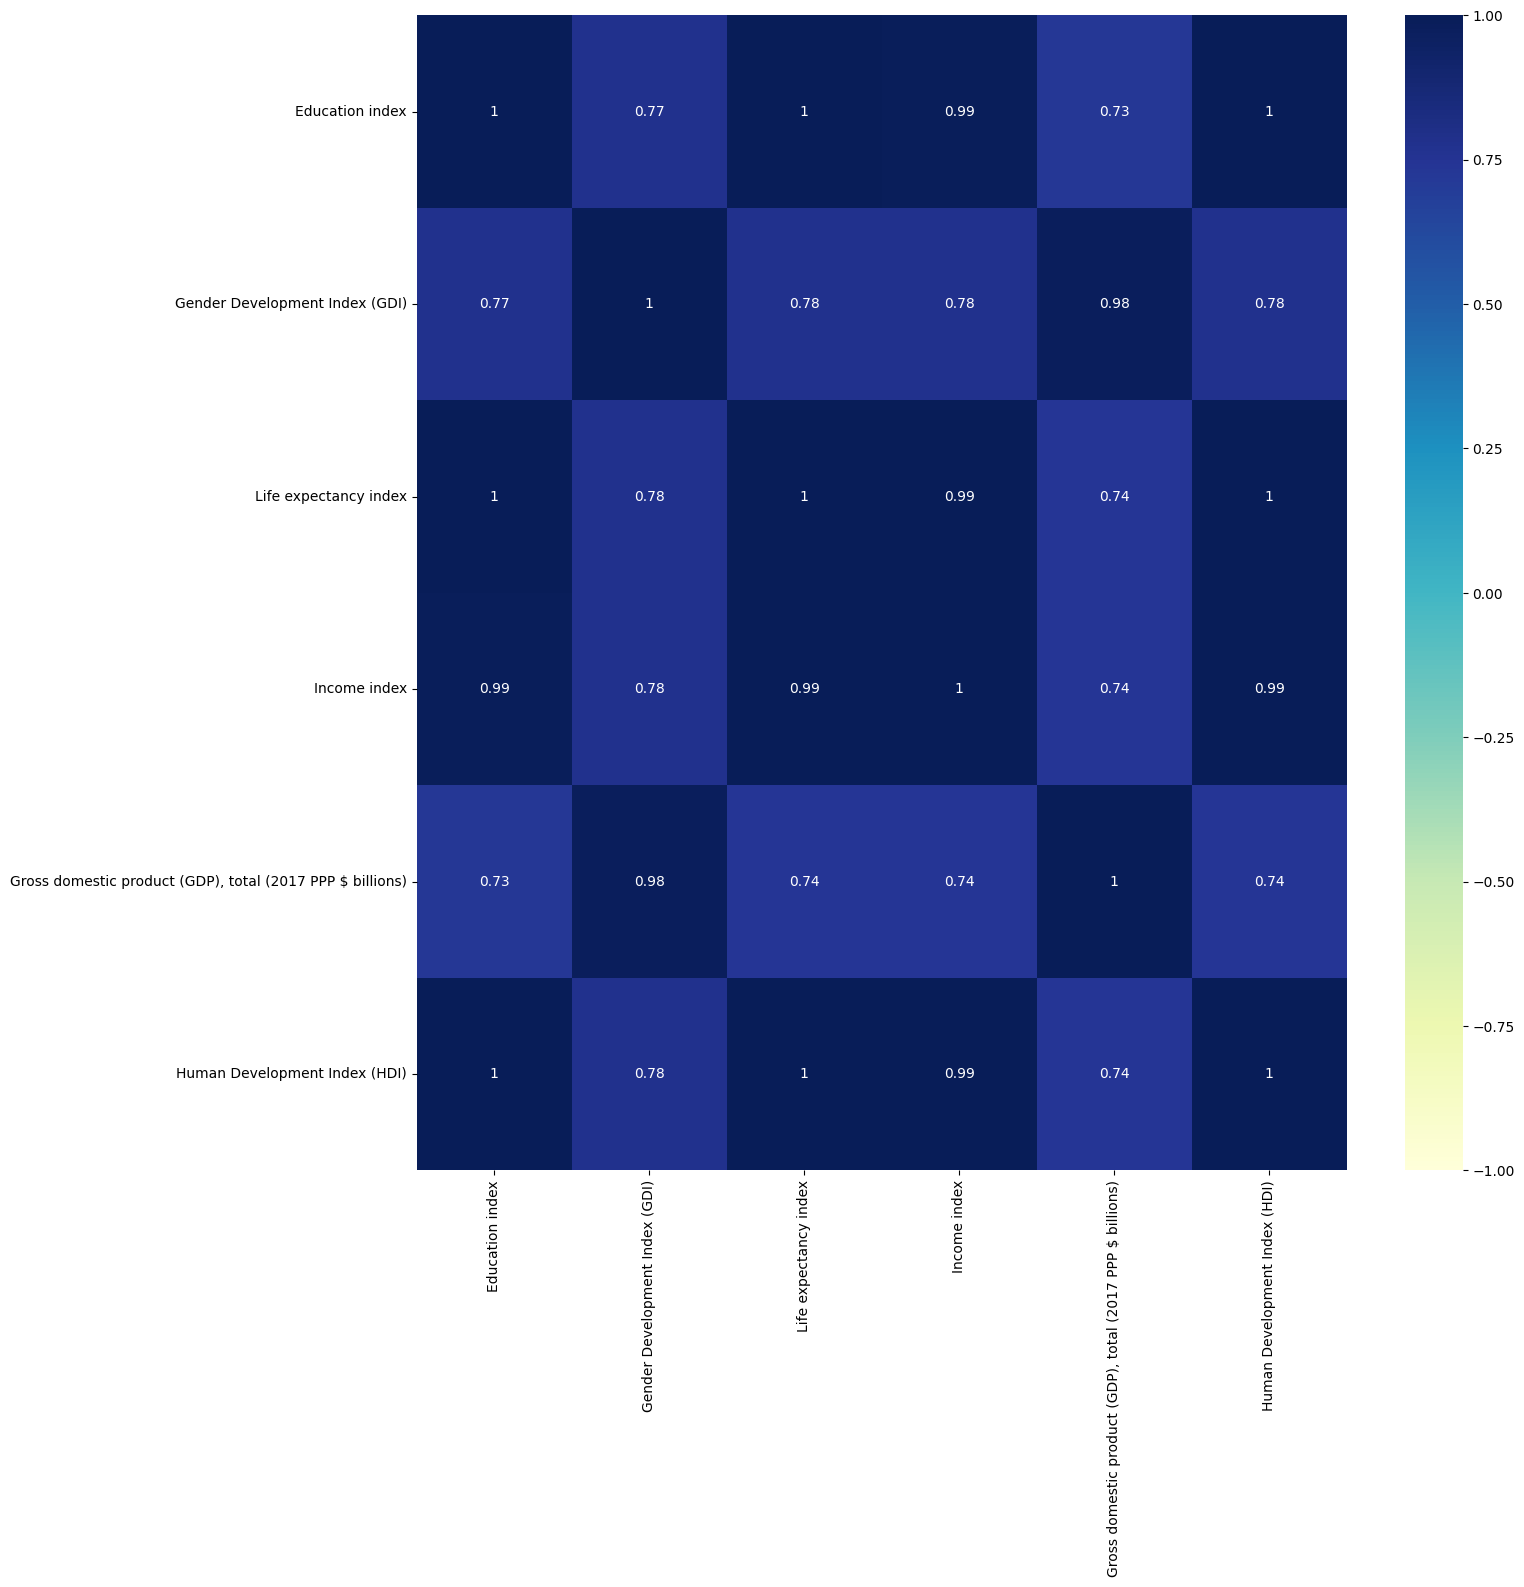

In [16]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df1.corr(method='spearman'), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")

In [17]:
df1.corr(method='spearman')

,Education index,Gender Development Index (GDI),Life expectancy index,Income index,"Gross domestic product (GDP), total (2017 PPP $ billions)",Human Development Index (HDI)
Education index,1.000000,0.774083,0.999267,0.991934,0.731700,0.999175
Gender Development Index (GDI),0.774083,1.000000,0.779854,0.778617,0.978033,0.779925
Life expectancy index,0.999267,0.779854,1.000000,0.992667,0.737158,0.999908
Income index,0.991934,0.778617,0.992667,1.000000,0.736349,0.993492
"Gross domestic product (GDP), total (2017 PPP $ billions)",0.731700,0.978033,0.737158,0.736349,1.000000,0.737225
Human Development Index (HDI),0.999175,0.779925,0.999908,0.993492,0.737225,1.000000


### Kendal

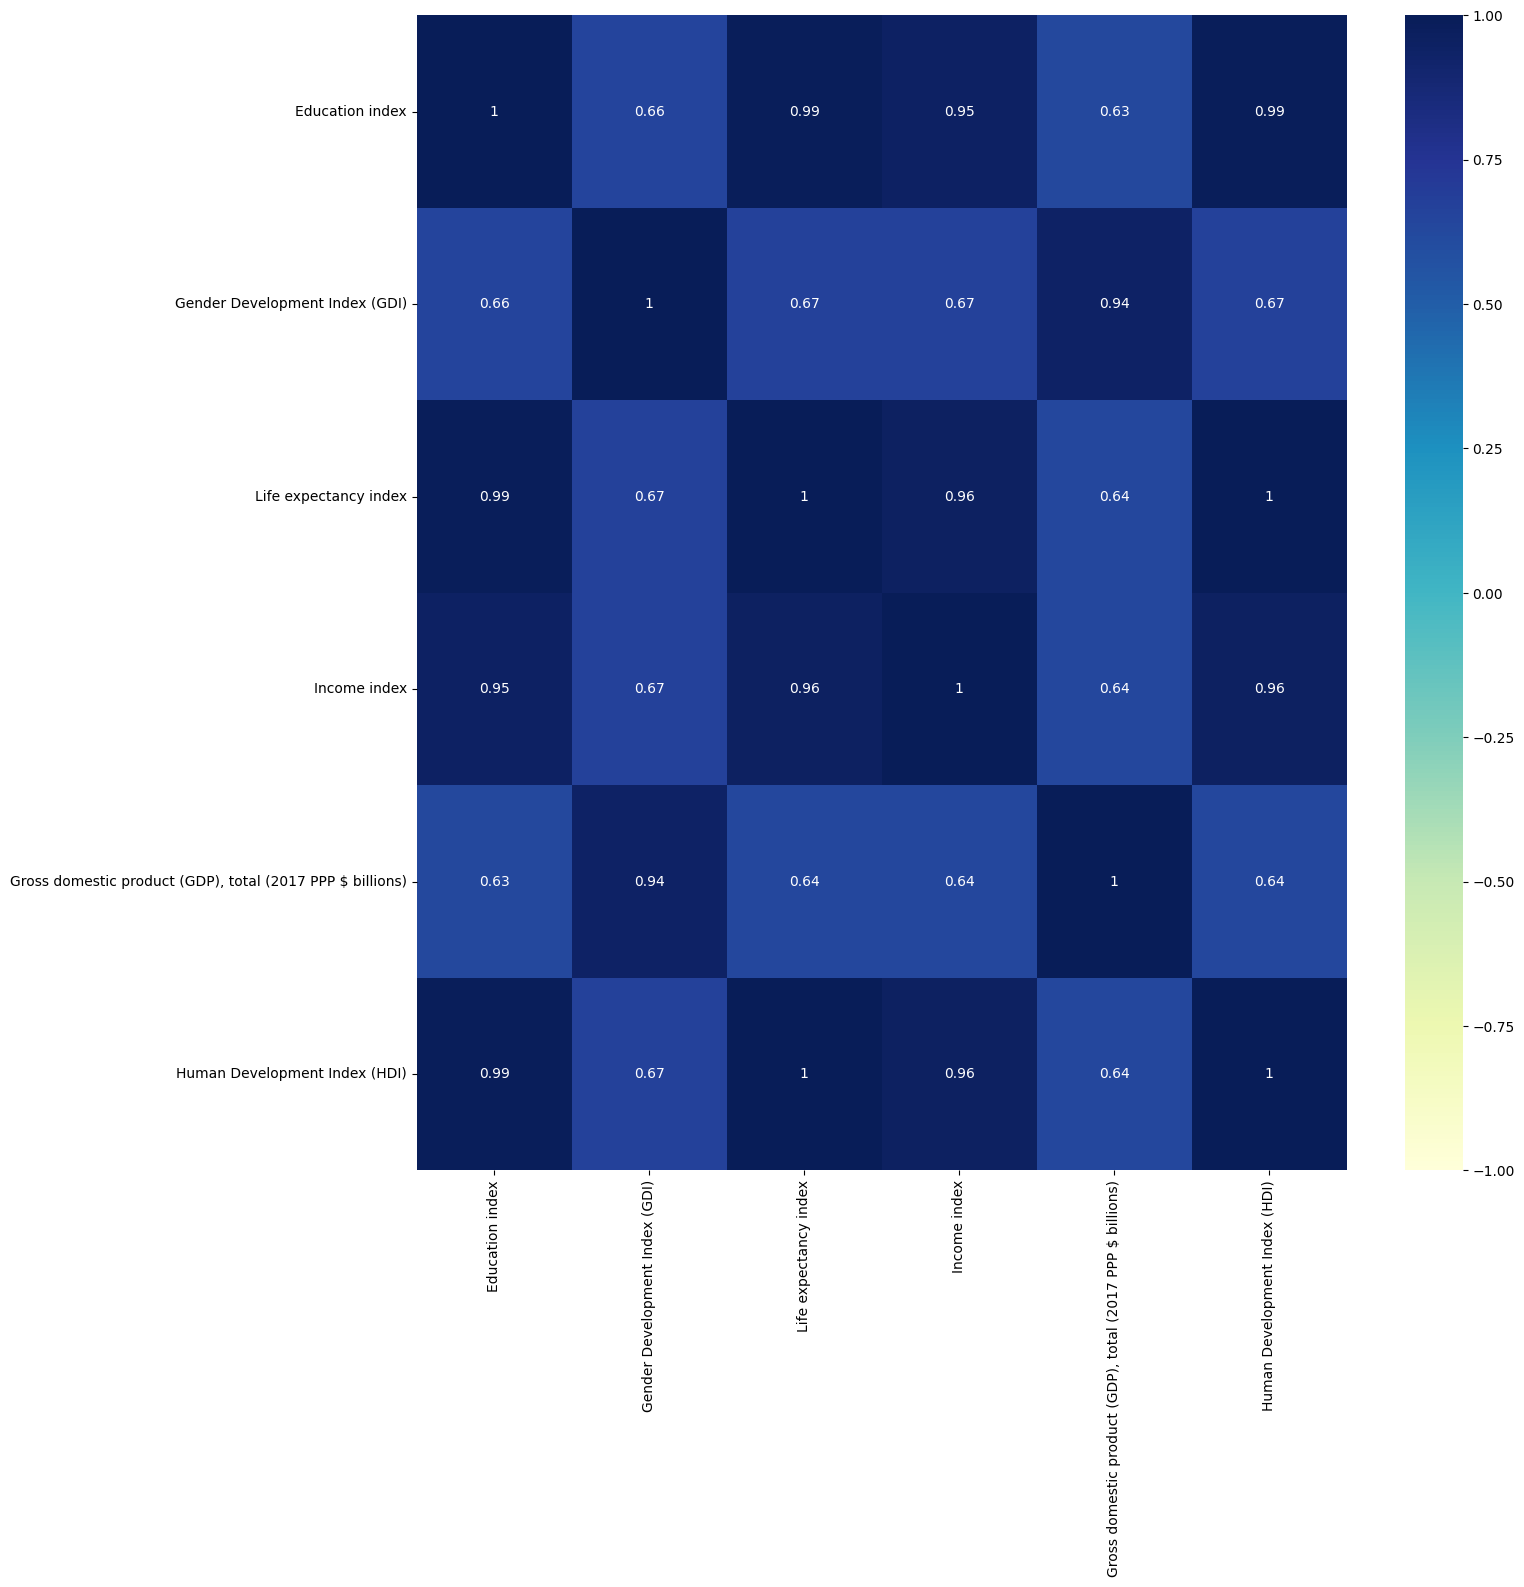

In [18]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df1.corr(method='kendall'), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")

In [19]:
df1.corr(method='kendall')

,Education index,Gender Development Index (GDI),Life expectancy index,Income index,"Gross domestic product (GDP), total (2017 PPP $ billions)",Human Development Index (HDI)
Education index,1.000000,0.655709,0.991919,0.947475,0.628565,0.990900
Gender Development Index (GDI),0.655709,1.000000,0.665682,0.665682,0.943456,0.666356
Life expectancy index,0.991919,0.665682,1.000000,0.955556,0.638272,0.998989
Income index,0.947475,0.665682,0.955556,1.000000,0.638272,0.958544
"Gross domestic product (GDP), total (2017 PPP $ billions)",0.628565,0.943456,0.638272,0.638272,1.000000,0.638918
Human Development Index (HDI),0.990900,0.666356,0.998989,0.958544,0.638918,1.000000


## Data Mining for contributing indicators

In [20]:
lis = list(categories)    

In [21]:
def get_indicators(w_list,indi_lis):
    f_list = []
    for i in w_list:
        temp = list(filter(lambda x: i in x, categories))
        for i in temp[:]:
            if i in lis:
                lis.remove(i)
        f_list.extend(temp)
    f_list = list(set(f_list))
    f_list.sort()

    return f_list

### Education Index

In [22]:
edu_w_list = ['Education','education','schooling','School','school','Student','student','Skilled labour']
edu_con = get_indicators(edu_w_list,lis)
edu_con

['Education index',
 'Expected years of schooling (years)',
 'Expected years of schooling, female (years)',
 'Expected years of schooling, male (years)',
 'Government expenditure on education (% of GDP)',
 'Gross enrolment ratio, pre-primary (% of preschool-age children)',
 'Gross enrolment ratio, primary (% of primary school-age population)',
 'Gross enrolment ratio, secondary (% of secondary school-age population)',
 'Gross enrolment ratio, tertiary (% of tertiary school-age population)',
 'Inequality in education (%)',
 'Inequality-adjusted education index',
 'International student mobility (% of total tertiary enrolment)',
 'Mean years of schooling (years)',
 'Mean years of schooling, female (years)',
 'Mean years of schooling, male (years)',
 'Population with at least some secondary education (% ages 25 and older)',
 'Population with at least some secondary education, female (% ages 25 and older)',
 'Population with at least some secondary education, male (% ages 25 and older)',
 

In [23]:
edu_df = df_restructure(edu_con,years)

In [24]:
edu_df

,Education index,Expected years of schooling (years),"Expected years of schooling, female (years)","Expected years of schooling, male (years)",Government expenditure on education (% of GDP),"Gross enrolment ratio, pre-primary (% of preschool-age children)","Gross enrolment ratio, primary (% of primary school-age population)","Gross enrolment ratio, secondary (% of secondary school-age population)","Gross enrolment ratio, tertiary (% of tertiary school-age population)",Inequality in education (%),...,Programme for International Student Assessment (PISA) score in mathematics,Programme for International Student Assessment (PISA) score in reading,Programme for International Student Assessment (PISA) score in science,"Pupil-teacher ratio, primary school (pupils per teacher)",Ratio of education and health expenditure to military expenditure,"Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are female (%)","Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are male (%)",Skilled labour force (% of labour force),Survival rate to the last grade of lower secondary general education (%),Youth not in school or employment (% ages 15-24)
1990,0.691810,14.381150,14.04370,14.70100,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1991,0.705422,14.657610,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1992,0.714792,14.781320,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1993,0.739874,15.470650,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1994,0.749785,15.613860,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1995,0.758784,15.724230,15.35020,16.09580,4.42079,83.21290,101.37612,104.96017,45.32742,0.000000,...,0.000000,0.000000,0.000000,17.45831,0.00000,0.00000,0.00000,0.0000,75.28176,0.000
1996,0.766853,15.810720,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1997,0.774854,15.894730,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1998,0.794163,16.094474,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000
1999,0.809546,16.152869,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.000


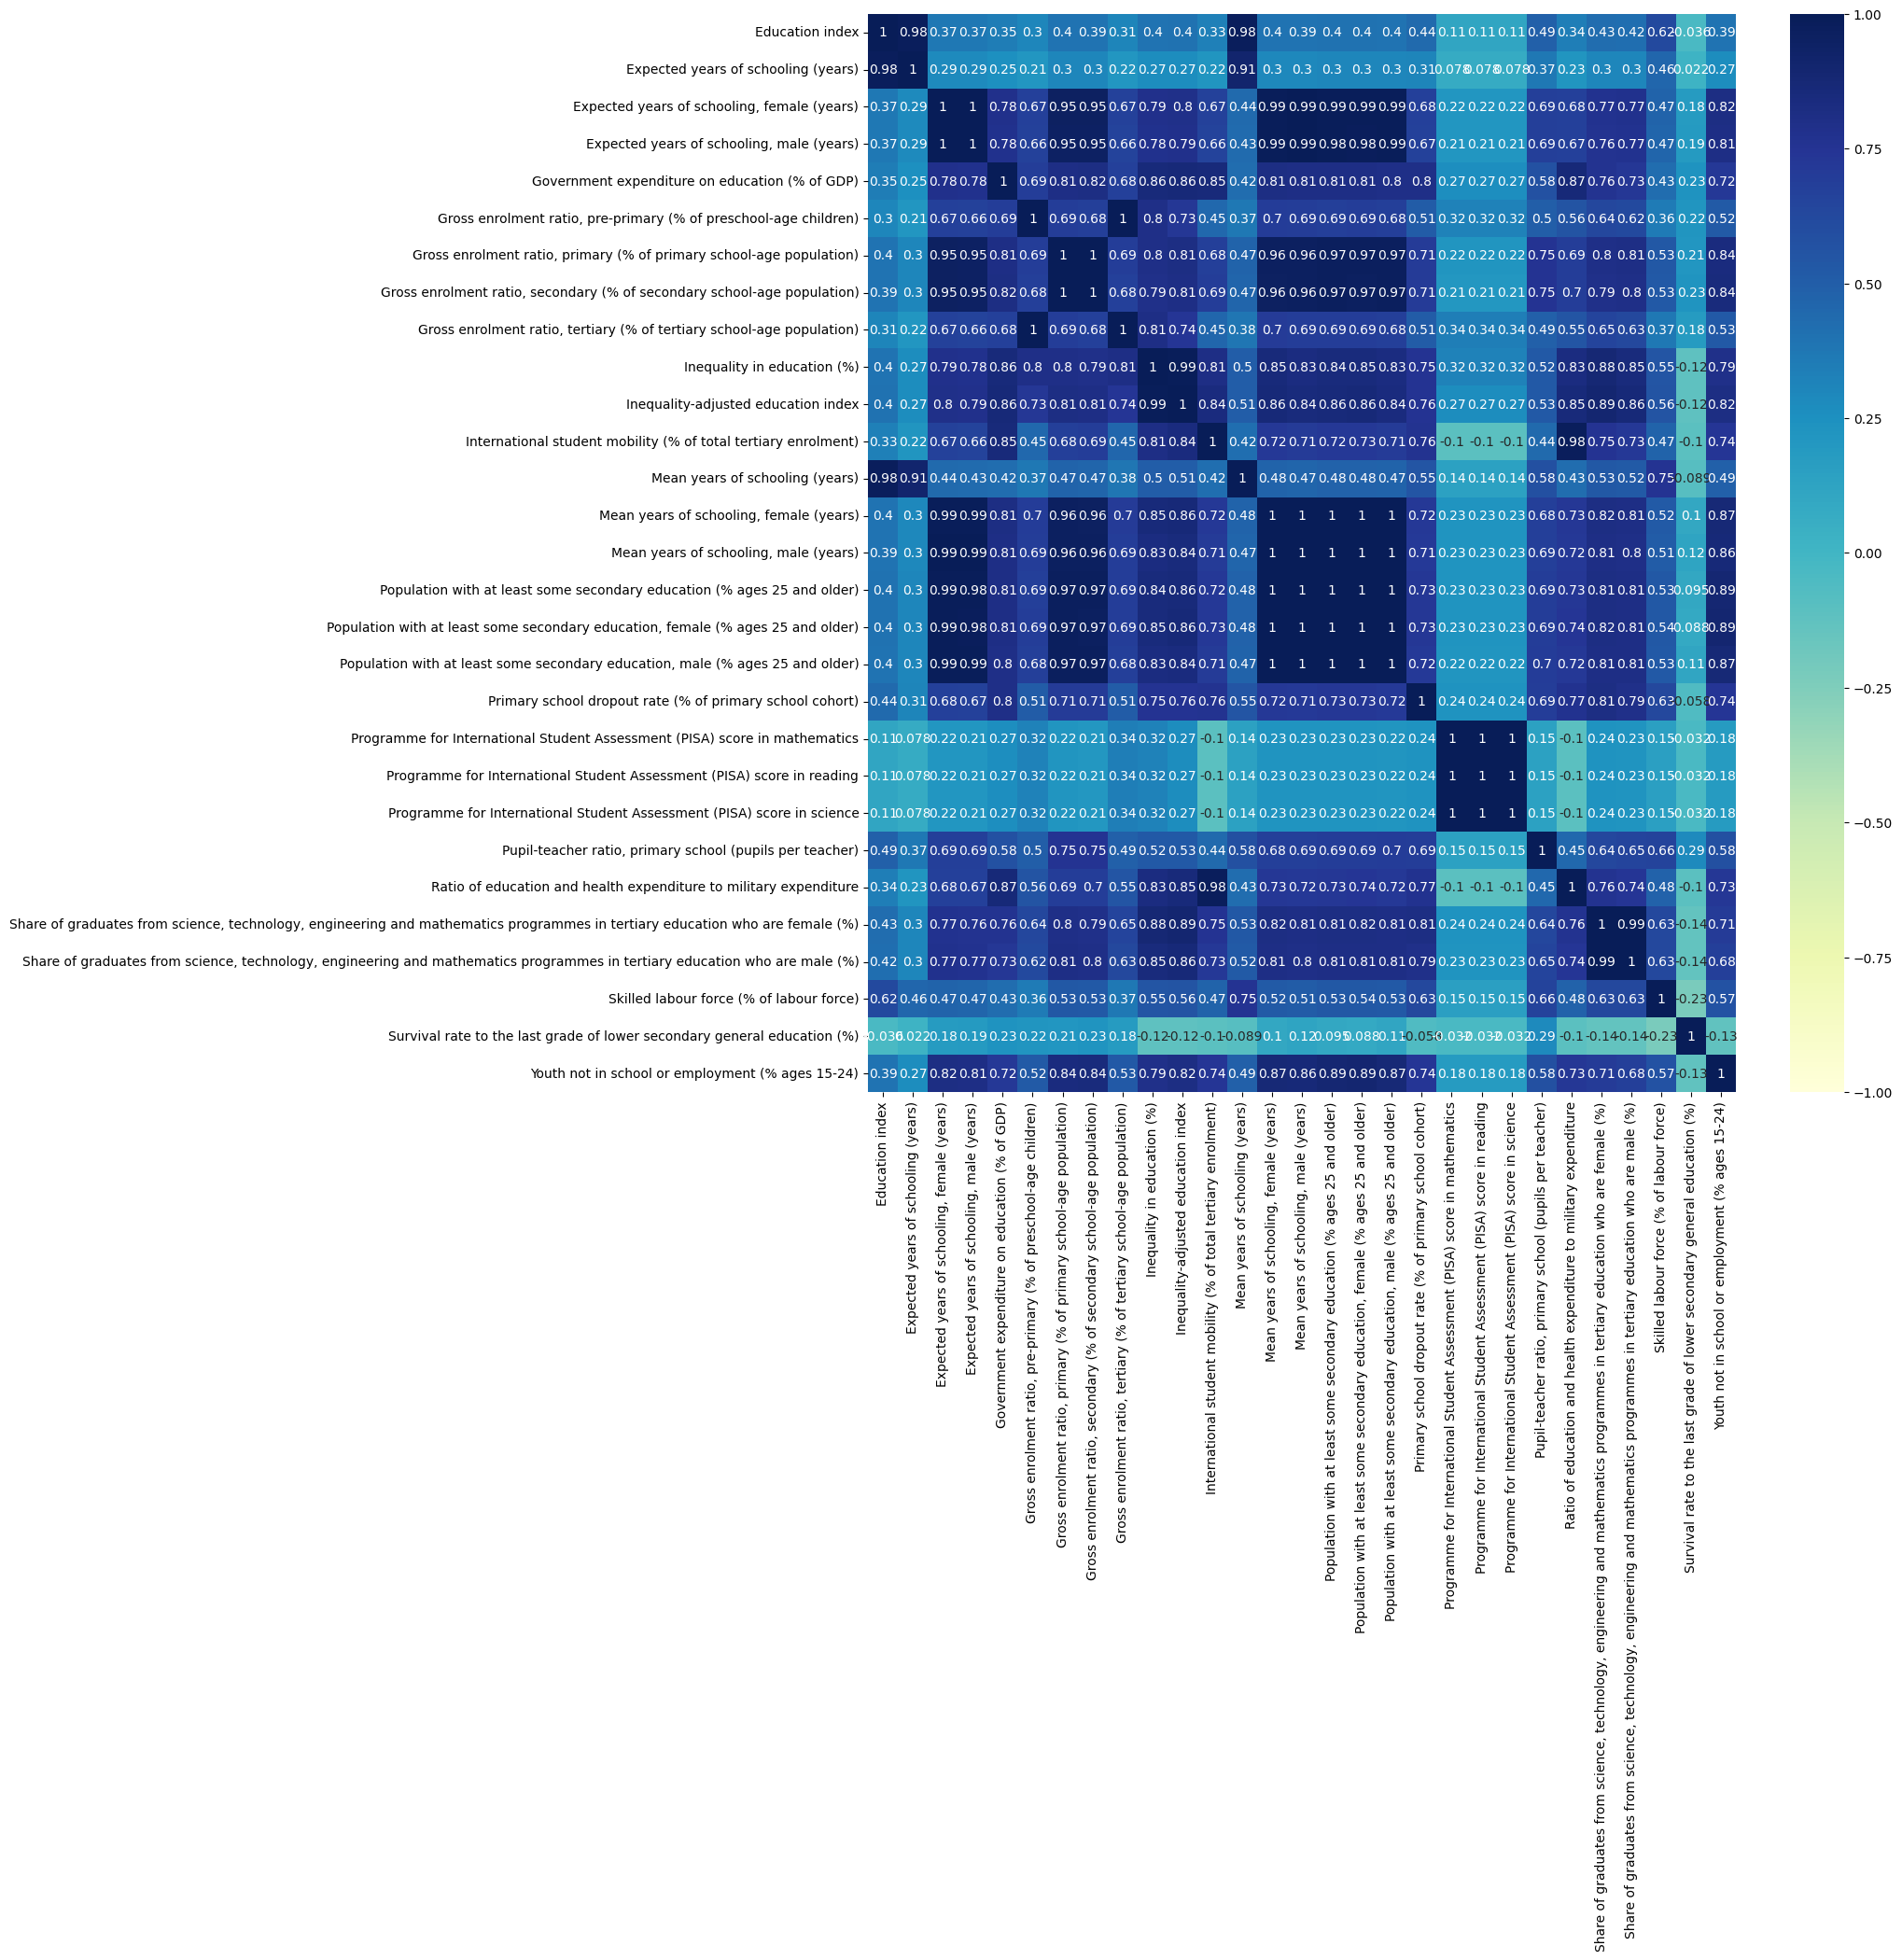

In [30]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(edu_df.corr(method='pearson'), vmin=-1, vmax=1, annot=True,cmap="YlGnBu")

In [31]:
edu_df.corr(method='pearson')

,Education index,Expected years of schooling (years),"Expected years of schooling, female (years)","Expected years of schooling, male (years)",Government expenditure on education (% of GDP),"Gross enrolment ratio, pre-primary (% of preschool-age children)","Gross enrolment ratio, primary (% of primary school-age population)","Gross enrolment ratio, secondary (% of secondary school-age population)","Gross enrolment ratio, tertiary (% of tertiary school-age population)",Inequality in education (%),...,Programme for International Student Assessment (PISA) score in mathematics,Programme for International Student Assessment (PISA) score in reading,Programme for International Student Assessment (PISA) score in science,"Pupil-teacher ratio, primary school (pupils per teacher)",Ratio of education and health expenditure to military expenditure,"Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are female (%)","Share of graduates from science, technology, engineering and mathematics programmes in tertiary education who are male (%)",Skilled labour force (% of labour force),Survival rate to the last grade of lower secondary general education (%),Youth not in school or employment (% ages 15-24)
Education index,1.000000,0.977140,0.373872,0.370952,0.347395,0.301427,0.395854,0.393589,0.305309,0.395348,...,0.112697,0.112697,0.112697,0.488041,0.336490,0.428413,0.420998,0.624275,-0.035833,0.392788
Expected years of schooling (years),0.977140,1.000000,0.288538,0.287330,0.250851,0.214482,0.298649,0.297738,0.215368,0.266940,...,0.078022,0.078022,0.078022,0.368739,0.226360,0.300144,0.298093,0.459838,0.021647,0.271128
"Expected years of schooling, female (years)",0.373872,0.288538,1.000000,0.999869,0.783106,0.672320,0.954270,0.953323,0.669955,0.786373,...,0.216853,0.216853,0.216853,0.687178,0.677342,0.770738,0.774846,0.473507,0.180214,0.816798
"Expected years of schooling, male (years)",0.370952,0.287330,0.999869,1.000000,0.780165,0.664905,0.952195,0.951625,0.662000,0.777600,...,0.212853,0.212853,0.212853,0.686831,0.671994,0.764049,0.768624,0.467447,0.189473,0.812057
Government expenditure on education (% of GDP),0.347395,0.250851,0.783106,0.780165,1.000000,0.688012,0.808463,0.816300,0.677601,0.858635,...,0.265180,0.265180,0.265180,0.576801,0.866900,0.761430,0.733764,0.427255,0.234601,0.720938
"Gross enrolment ratio, pre-primary (% of preschool-age children)",0.301427,0.214482,0.672320,0.664905,0.688012,1.000000,0.692212,0.681085,0.998231,0.800288,...,0.323395,0.323395,0.323395,0.498962,0.555586,0.640199,0.618794,0.358757,0.222080,0.520879
"Gross enrolment ratio, primary (% of primary school-age population)",0.395854,0.298649,0.954270,0.952195,0.808463,0.692212,1.000000,0.999253,0.688961,0.802742,...,0.221928,0.221928,0.221928,0.750045,0.689997,0.800165,0.806967,0.534201,0.212504,0.842652
"Gross enrolment ratio, secondary (% of secondary school-age population)",0.393589,0.297738,0.953323,0.951625,0.816300,0.681085,0.999253,1.000000,0.676105,0.794966,...,0.208353,0.208353,0.208353,0.751435,0.695129,0.792419,0.797995,0.527115,0.232108,0.843985
"Gross enrolment ratio, tertiary (% of tertiary school-age population)",0.305309,0.215368,0.669955,0.662000,0.677601,0.998231,0.688961,0.676105,1.000000,0.811866,...,0.340902,0.340902,0.340902,0.491599,0.552263,0.650107,0.628615,0.370487,0.183551,0.528722
Inequality in education (%),0.395348,0.266940,0.786373,0.777600,0.858635,0.800288,0.802742,0.794966,0.811866,1.000000,...,0.321697,0.321697,0.321697,0.524441,0.832673,0.880162,0.850220,0.551996,-0.119536,0.794981


### Gender Development Index

In [25]:
gdi_w_list = ['Gender','Inequality','inequality','female','women','male']
gdi_con = get_indicators(gdi_w_list,lis)
gdi_con

['Adolescent birth rate (births per 1,000 women ages 15-19)',
 'Age-standardized mortality rate attributed to noncommunicable diseases, female',
 'Age-standardized mortality rate attributed to noncommunicable diseases, male',
 'Coefficient of human inequality',
 'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)',
 'Estimated gross national income per capita, female (2017 PPP $)',
 'Estimated gross national income per capita, male (2017 PPP $)',
 'Expected years of schooling, female (years)',
 'Expected years of schooling, male (years)',
 'Female share of employment in senior and middle management (%)',
 'Gender Development Index (GDI)',
 'Gender Inequality Index (GII)',
 'Human Development Index (HDI), female',
 'Human Development Index (HDI), male',
 'Income inequality, Gini coefficient',
 'Income inequality, quintile ratio',
 'Inequality in education (%)',
 'Inequality in income (%)',
 'Inequality in life expectancy (%)',
 'Inequa

### GDP

In [26]:
gdp_w_list = ['GDP','tourists','import','export']
gdp_con = get_indicators(gdp_w_list,lis)
gdp_con

['Carbon dioxide emissions, per unit of GDP (kg per 2010 US$ of GDP)',
 'Concentration index (exports) (value)',
 'Current health expenditure (% of GDP)',
 'Exports and imports (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'GDP per capita (2017 PPP $)',
 'Government expenditure on education (% of GDP)',
 'Gross capital formation (% of GDP)',
 'Gross domestic product (GDP), total (2017 PPP $ billions)',
 'Gross fixed capital formation (% of GDP)',
 'International inbound tourists (thousands)',
 'Labour share of GDP, comprising wages and social protection transfers (%)',
 'Private capital flows (% of GDP)',
 'Remittances, inflows (% of GDP)',
 'Research and development expenditure (% of GDP)']

### Life Expectancy

In [27]:
life_w_list = ['Life expectancy','Birth','birth','Death','death','Mortality','mortality','Suicide rate','Population',
               'population','immunization','age','maternity','Homicide','Tuberculosis']
life_con = get_indicators(life_w_list,lis)
life_con

['Adolescent birth rate (births per 1,000 women ages 15-19)',
 'Age-standardized mortality rate attributed to noncommunicable diseases, female',
 'Age-standardized mortality rate attributed to noncommunicable diseases, male',
 'Average annual change in the share of bottom 40 percent (%)',
 'Birth registration (% under age 5)',
 'Child malnutrition, stunting (moderate or severe) (% under age 5)',
 'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)',
 'Employment to population ratio (% ages 15 and older)',
 'Female share of employment in senior and middle management (%)',
 'Gross enrolment ratio, pre-primary (% of preschool-age children)',
 'Gross enrolment ratio, primary (% of primary school-age population)',
 'Gross enrolment ratio, secondary (% of secondary school-age population)',
 'Gross enrolment ratio, tertiary (% of tertiary school-age population)',
 'HIV prevalence, adult (% ages 15-49)',
 'Homicide rate (per 100,000 people)',

### Income

In [28]:
income_w_list = ['Income','income','GNI','Employment','employment']
income_con = get_indicators(income_w_list,lis)
income_con

['Adjusted net savings (% of GNI)',
 'Employment in agriculture (% of total employment)',
 'Employment in services (% of total employment)',
 'Employment to population ratio (% ages 15 and older)',
 'Estimated gross national income per capita, female (2017 PPP $)',
 'Estimated gross national income per capita, male (2017 PPP $)',
 'Female share of employment in senior and middle management (%)',
 'Gross national income (GNI) per capita (constant 2017 PPP$)',
 'Income index',
 'Income inequality, Gini coefficient',
 'Income inequality, quintile ratio',
 'Income share held by poorest 40%',
 'Income share held by richest 1%',
 'Income share held by richest 10 %',
 'Inequality in income (%)',
 'Inequality-adjusted income index',
 'Natural resource depletion (% of GNI)',
 'Population living below income poverty line, PPP $1.90 a day (%)',
 'Share of employment in nonagriculture, female (% of total employment in nonagriculture)',
 'Total unemployment rate (female to male ratio)',
 'Unemploym

### remaining indicators

In [29]:
lis

['Carbon dioxide emissions, production emissions per capita (tonnes)',
 'Domestic material consumption per capita, (tonnes)',
 'Forest area (% of total land area)',
 'Forest area, change (%)',
 'Fossil fuel energy consumption (% of total energy consumption)',
 'Fresh water withdrawals (% of total renewable water resources)',
 'HDI rank',
 'Human Development Index (HDI)',
 'Mobile phone subscriptions (per 100 people)',
 'Net migration rate (per 1,000 people)',
 'Red List Index (value)',
 'Refugees by country of origin (thousands)',
 'Use of fertilizer nutrient nitrogen (N), per area of cropland (kg per hectare)',
 'Use of fertilizer nutrient phosphorus (expressed as P2O5), per area of cropland (kg per hectare)']